#### Docstrings:
Docstrings are a Python best practice that will make your code much easier to use, read, and maintain. 
Look at this `split_and_stack()` function. If you wanted to understand what the function does, what the arguments are supposed to be, and what it returns, you would have to spend some time deciphering the code.

In [1]:
import pandas as pd
import numpy as np

# A complex function
def split_and_stack(df, new_names):
  half = int(len(df.columns) /2)
  left = df.iloc[:, :half]
  right = df.iloc[:, half:]
  return pd.DataFrame(data=np.vstack([left.values, right.values]), columns=new_names)

With a docstring though, it is much easier to tell what the expected inputs and outputs should be, as well as what the function does. This makes it easier for you and other engineers to use your code in the future.

In [2]:
def split_and_stack(df, new_names):
  """ 
  Split a DataFrame's columns into two halves and then stack them 
  vertically,returning a new DataFrame with 'new_names' as the column names.
  
  Args: df(DataFrame): The DataFrame to split.
  new_names(iterable of str): The column names for the new DataFrame.

  Returns:
    DataFrame
  """
  half = int(len(df.columns) /2)
  left = df.iloc[:, :half]
  right = df.iloc[:, half:]
  return pd.DataFrame(data=np.vstack([left.values, right.values]),
                      columns=new_names)

##### Anatomy of a docstring
A docstring is a string written as the first line of a function. Because docstrings usually span multiple lines, they are enclosed in triple quotes, Python's way of writing multi-line strings. Every docstring has some (although usually not all) of these five key pieces of information: what the function does, what the arguments are, what the return value or values should be, info about any errors raised, and anything else you'd like to say about the function.

In [3]:
def function_name(arguments):
  """ 
  Description of what the function does.
  Description of the arguments, if any.
  Description of the return value(S), if any.
  Description of errors raised, if any.
  Optional extra notes or examples of usage.
  """

#### Docstring formats

Consistent style makes a project easier to read, and the Python community has evolved several standards for how to format your docstrings. Google-style and Numpydoc are the most popular formats, so we'll focus on those. Others are;

* reStructuredText
* EpyText

**Google Style**
 
In Google style, the docstring starts with a concise description of what the function does. This should be in imperative language. For instance: "Split the data frame and stack the columns" instead of "This function will split the data frame and stack the columns".

Next comes the "Args" section where you list each argument name, followed by its expected type in parentheses, and then what its role is in the function. If you need extra space, you can break to the next line and indent as I've done here. If an argument has a default value, mark it as "optional" when describing the type. If the function does not take any parameters, feel free to leave this section out.

The next section is the "Returns" section, where you list the expected type or types of what gets returned. You can also provide some comment about what gets returned, but often the name of the function and the description will make this clear. Additional lines should not be indented.

Finally, if your function intentionally raises any errors, you should add a "Raises" section. You can also include any additional notes or examples of usage in free form text at the end.

In [4]:
def function (arg_1, arg_2=42):
  """
  Description of what the function does.

  Args: 
    arg_1(str): Description of arg_1 that can break onto the line if needed
    arg_2(int, optional): Write optional when an argument has a default value.

  Returns:
    bool: Optional description of the return value
    Extra lines are not indented.
  
  Raises: 
    ValueError: Include any error types that the function intentionally rises.
  
  Notes: 
    See https://www.datacamp.com/community/turtorials/docstring-python
    for more info.
  """

#### Numpydoc: 

The Numpydoc format is very similar and is the most common format in the scientific Python community. Personally, I think it looks better than the Google style. It takes up more vertical space though, so this course will either use Google-style or leave out the docstrings entirely to keep the examples compact and legible.

In [5]:
def function(arg_1, arg_2=42):
  """
  Description of what he function does.

  Parameters
  -----------
  arg_1: expected type of arg_1
    Description of arg_1
  arg_2: int, optional
    Write optional when an argument has a default value. 
    Default = 42
  Returns
  --------- 
  The type of the return value
    Can include a description of the return value.
    Replace "Returns" with "Yields" if this function is a generator.
  """

Retrieving docstrings: 

Sometimes it is useful for your code to access the contents of your function's docstring. Every function in Python comes with a __doc__ attribute that holds this information. Notice that the __doc__ attribute contains the raw docstring, including any tabs or spaces that were added to make the words line up visually. To get a cleaner version, with those leading spaces removed, you can use the **getdoc()** function from the **inspect** module. The **inspect** module contains a lot of useful methods for gathering information about functions.

In [6]:
def the_answer():
  """Return the answer to life, the universe, and everything.
  
  Returns:
    int
  """  
  
  return 42
print(the_answer.__doc__)

Return the answer to life, the universe, and everything.
  
  Returns:
    int
  


In [7]:
import inspect 
print(inspect.getdoc(the_answer))

Return the answer to life, the universe, and everything.

Returns:
  int


**TASK: Crafting a docstring**

You've decided to write the world's greatest open-source natural language processing Python package. It will revolutionize working with free-form text, the way numpy did for arrays, pandas did for tabular data, and scikit-learn did for machine learning.

The first function you write is **count_letter()**. It takes a string and a single letter and returns the number of times the letter appears in the string. You want the users of your open-source package to be able to understand how this function works easily, so you will need to give it a docstring. Build up a Google Style docstring for this function by following these steps.

1. Copy the following string and add it as the docstring for the function: Count the number of times `letter` appears in `content`.
2. Now add the arguments section, using the Google style for docstrings. Use `str` to indicate a string.
3. Add a returns section that informs the user the return value is an `int`.
4. Finally, add some information about the `ValueError` that gets raised when the arguments aren't correct.

In [8]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

**Retriving docstrings:**
You and a group of friends are working on building an amazing new Python IDE (integrated development environment like PyCharm, Spyder, Eclipse, Visual Studio, etc.). The team wants to add a feature that displays a tooltip with a function's docstring whenever the user starts typing the function name. That way, the user doesn't have to go elsewhere to look up the documentation for the function they are trying to use. You've been asked to complete the `build_tooltip()`function that retrieves a docstring from an arbitrary function.

In [9]:
import inspect 
def build_tooltip(function):
  """
  Create a tooltip for any function that shows the function's docstring.

  Args:
    function (callable): The function we want a tooltip for.
  Returns:
    str
  """
  # Get the docstring for the "function" argument by using inspect
  docstring = inspect.getdoc(function)
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring,border)
print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

############################
Count the number of times `letter` appears in `content`.

Args:
  content (str): The string to search.
  letter (str): The letter to search for.

Returns:
  int

# Add a section detailing what errors might be raised
Raises:
  ValueError: If `letter` is not a one-character string.
############################
############################
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
############################
############################
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword argument

#### DRY and "Don One Thing"
`DRY: Don't Repeat Yourself`

When you are writing code to look for answers to a research question, it is totally normal to copy and paste a bit of code, tweak it slightly, and re-run it. However, this kind of repeated code can lead to real problems. In this code snippet, I load my train, validation, and test data, and plot the first two principal components of each dataset. I wrote the code for the train dataset, then copied it and pasted it into the next two blocks, updating the paths and the variable names.

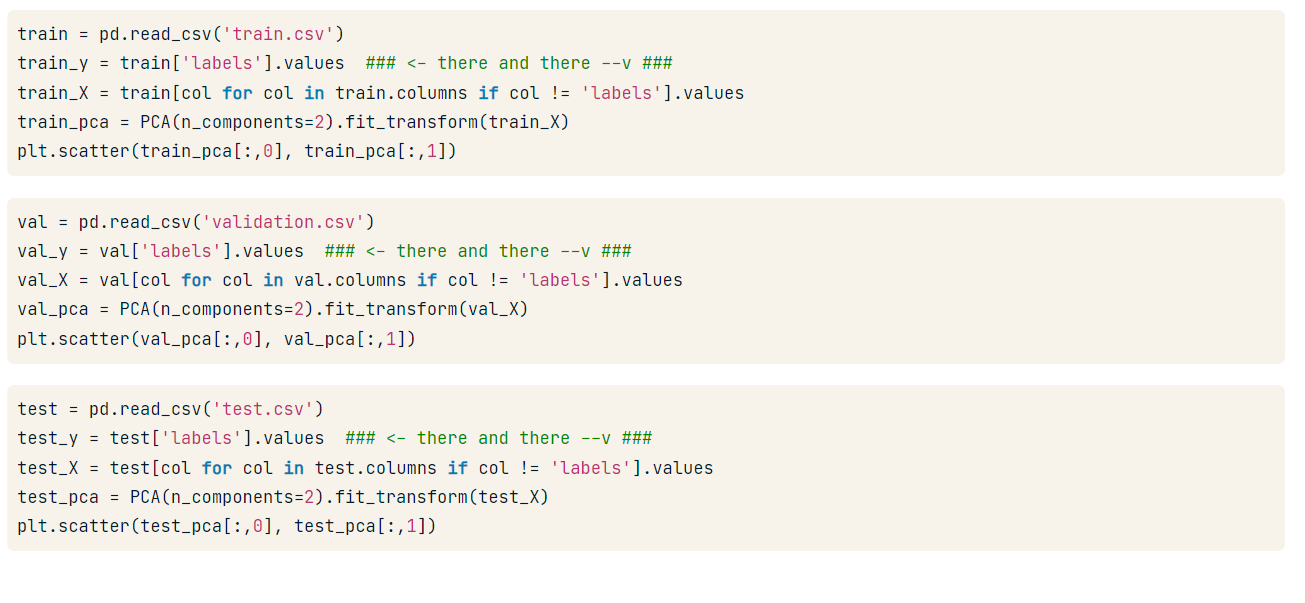

But one of the problems with copying and pasting is that it is easy to accidentally introduce errors that are hard to spot. 

Another problem with repeated code is that if you want to change something, you often have to do it in multiple places. For instance, if we realized that our CSVs used the column name `"label"` instead of `"labels"`, we would have to change our code in six places. Repeated code like this is a good sign that you should write a function.




**Using Function to avoid repetition:**

Wrapping the repeated logic in a function and then calling that function several times makes it much easier to avoid the kind of errors introduced by copying and pasting. And if you ever need to change the column `"label"` back to `"labels"`. 

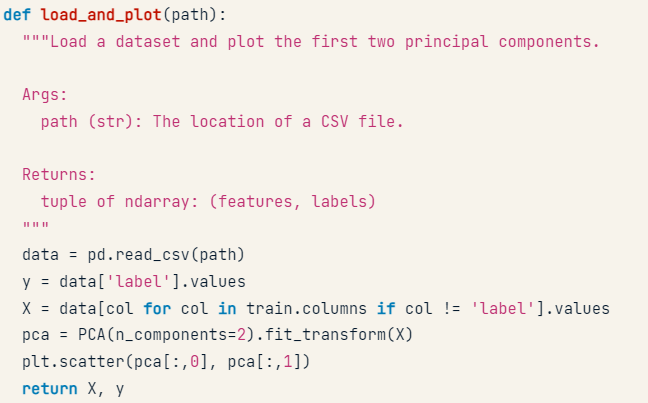

If you want to swap out PCA for some other dimensionality reduction technique, you only have to do it in one or two places.

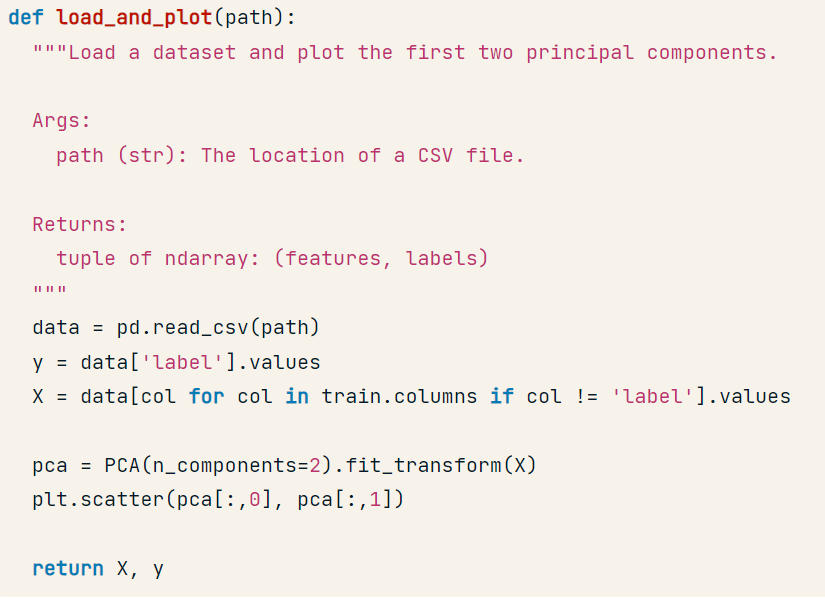

However, there is still a big problem with this function. First, it loads the data. And then it returns the loaded data. This function violates another software engineering principle: Do One Thing. Every function should have a single responsibility. Let's look at how we could split this one up.

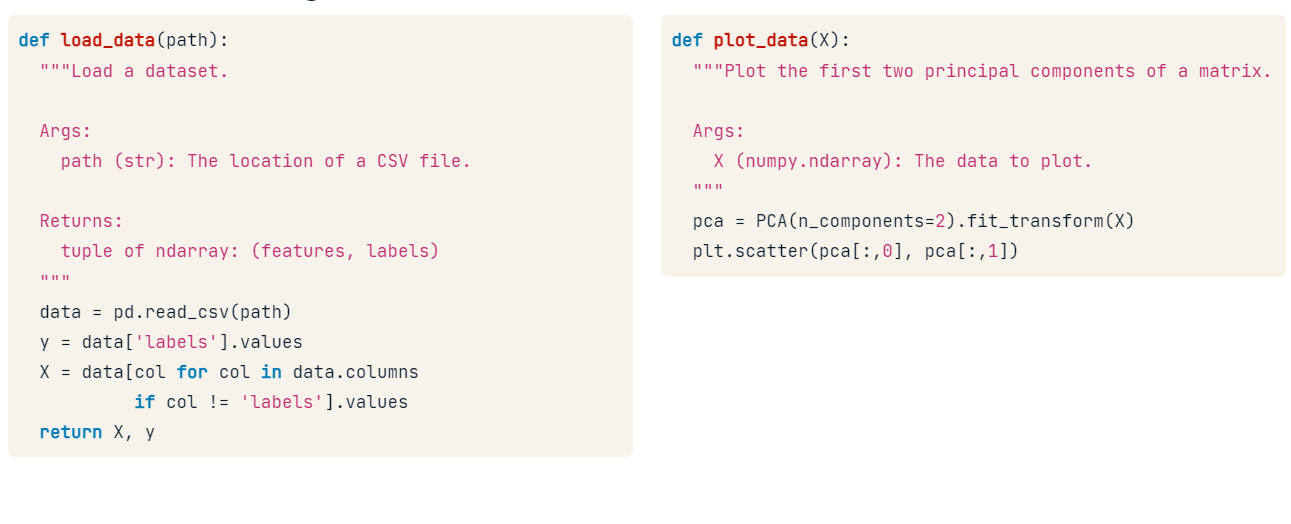

Instead of one big function, we could have a more nimble function that just loads the data and a second one for plotting. We get several advantages from splitting the `load_and_plot()` function into two smaller functions. First of all, our code has become more flexible. Imagine that later on in your script, you just want to load the data and not plot it. That's easy now with the `load_data()` function. Likewise, if you wanted to do some transformation to the data before plotting, you can do the transformation and then call the `plot_data()` function. We have decoupled the loading functionality from the plotting functionality.

**Advantages of doing one thing**

The code will also be easier for other developers to understand, and it will be more pleasant to test and debug. Finally, if you ever need to update your code, functions that each have a single responsibility make it easier to predict how changes in one place will affect the rest of the code.

**Code smells and refactoring**

Repeated code and functions that do more than one thing are examples of "code smells", which are indications that you may need to refactor. Refactoring is the process of improving code by changing it a little bit at a time. This process is well described in Martin Fowler's book, "Refactoring", which is a good read for any aspiring software engineer.

**Split up a function**

Another engineer on your team has written this function to calculate the mean and median of a sorted list. You want to show them how to split it into two simpler functions: `mean()` and `median()`

```python
def mean_and_median(values):
  """Get the mean and median of a sorted list of `values`

  Args:
    values (iterable of float): A list of numbers

  Returns:
    tuple (float, float): The mean and median
  """
  mean = sum(values) / len(values)
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]

  return mean, median
  ```

In [10]:
def mean(values):
  """ Get the mean of a sorted list of values

  Args: 
    Value (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the mean() funtion

  mean = sum(values) / len(values)
  return mean

def median(values):
  """Get the median of a sorted list of values

  Args: 
    values (iterable of float): A list of numbers

  Returns:
    float
  """ 
  midpoint = int(len(values)/2) 
  if len(values) % 2 == 0:
    median = (values[midpoint-1] + values[midpoint])
  else:
    median = values[midpoint]
  return median

In [11]:
def median(values):
  """Get the median of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the median() function
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]
  return median
median([1,2,3,4,5])

3

#### Passing by assignment:

The way that Python passes information to functions is different from many other languages. It is referred to as `"pass by assignment"`.

Let's say we have a function `foo()` that takes a list and sets the first value 

In [12]:
def foo(x):
  x[0] = 99
my_list = [1,2,3] 
foo(my_list)
print(my_list)

[99, 2, 3]



Lists in Python are mutable objects, meaning that they can be changed. 

Now let's say we have another function `bar()` that takes an argument and adds ninety to it

In [13]:
def bar(x):
  x = x + 90 
my_var = 3
bar(my_var)
print(my_var)


3


In Python, integers are immutable, meaning they can't be changed. 

##### Mutable and Immutable:

There are only a few immutable data types in Python because almost everything is represented as an object. The only way to tell if something is mutable is to see if there is a function or method that will change the object without assigning it to a new variable.

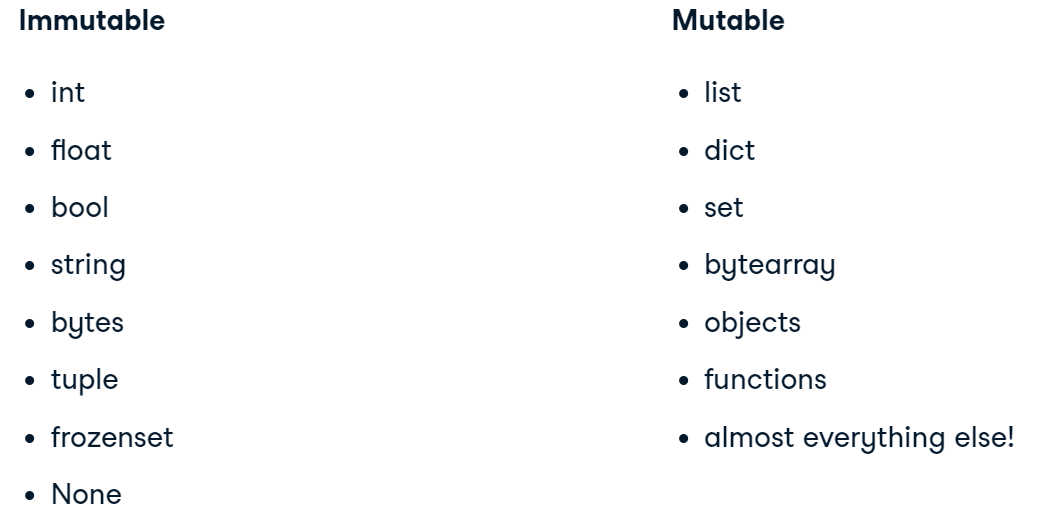

here is a thing that can get you into trouble. `foo()` is a function that appends the value 1 to the end of a list. But, whoever wrote this function gave the argument an empty list as a default value. When we call `foo()` the first time, we get what you would expect, a list with one entry.

In [14]:
def foo(var=[]):
  var.append(1)
  return var 
foo()

[1]

But, when we call `foo()` again, the default value has already been modified. 


In [15]:
foo()

[1, 1]

If you really want a mutable variable as a default value, consider defaulting to None and setting the argument in the function.

In [16]:
def foo(var=None):
  if var is None:
    var = []
  var.append(1)
  return var
foo()

[1]

In [17]:
foo()

[1]

Task:  The following function adds a mapping between a string and the lowercase version of that string to a dictionary. What do you expect the values of `d` and `s `to be after the function is called?



In [18]:
def store_lower(_dict, _string):
  """Add a mapping between `_string` and a lowered version of `_string` 
  to `_dict`

  Args:
    _dict(dict): The dictionay to updae
    _string(str): The string is add.
  """

  orig_string = _string
  _string = _string.lower()
  _dict[orig_string] = _string

  d = {}
  s = 'Hello'

  store_lower(d,s)


```python 
d = {'Hello': 'hello'}, s = 'Hello'

```
Dictionaries are mutable objects in Python, so the function can directly change it in the `_dict[_orig_string] = _string` statement. Strings, on the other hand, are immutable. When the function creates the lowercase version, it has to assign it to the `_string` variable. This disconnects what happens to ` _string` from the external s variable.

**Best practice for default arguments**

One of your co-workers (who obviously didn't take this course) has written this function for adding a column to a pandas DataFrame. Unfortunately, they used a mutable variable as a default argument value. Please show them a better way to do this so that they don't get unexpected behavior.
``` python
def add_column(values, df=pandas.DataFrame()):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  df['col_{}'.format(len(df.columns))] = values
  return df

  ```

In [19]:
import pandas as pd

# Use an immutable variable for the default argument
def better_add_column(values, df=None):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
  if df is None:
    df = pd.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df

### Context Manager:

A context manager is a type of function that sets up a context for your code to run in, runs your code, and then removes the context. 

You may have used code like this before. Here the  `"open()"` function is a context manager. 

``` python 

with open('my_file.txt) as my_file:
  text = my_file.read()
  length = len(text)

print('The file is {} characters long'.format(length))
```
`open()` does three things:
* Sets up a context by opening a file
* Lets you run any code you want on that file
* Removes the context by closing the file.

Any time you use a context manager, it will look like this. The keyword `"with"` lets Python know that you are trying to enter a context.

```python 
with <context-manager> (<args>):
  # Run your code here
  # This code is running "inside the context"

# This code runs after the context is removed
```
Then you call a function. You can call any function that is built to work as a context manager. A context manager can take arguments like any normal function.You end the `with` statement with a colon as if you were writing a for loop or an if statement.

Statements in Python that have an indented block after them, like for loops, if/else statements, function definitions, etc. are called `compound statements`. The `with` statement is another type of compound statement. Any code that you want to run inside the context that the context manager created needs to be indented.
When the indented block is done, the context manager gets a chance to clean up anything that it needs to, like when the `open()` context manager closed the file.

```python 
with <context-manager> (<args>) as <variable-name>:
  # Run your code here
  # This code is running "inside the context"

# This code runs after the context is removed
```
Some context managers want to return a value that you can use inside the context. By adding "as" and a variable name at the end of the "with" statement, you can assign the returned value to the variable name. 
```python
with open('my_file.txt') as my_file:
  text = my_file.read()
  length = len(text)

print('The file is {} characers long'.format(length))
```

We used this ability when calling the `open()` context manager, which returns a file that we can read from or write to. By adding `as my_file` to the `with` statement, we assigned the file to the variable `my_file`.

#### Writing Context Managers:

Now we will write a context manager for other people to use. There are two ways to define a context manager in Python: by using a class that has special`__enter__()` and `__exit__()` methods or by decorating a certain kind of function.

Here we focused on writing functions-based method here. There are five parts to creating a context manager. First, you need to define a function. Next, you can add any setup code your context needs. This is not required though. Third, you must use the `yield` keyword to signal to Python that this is a special kind of function. I will explain what this keyword means in a moment. After the `yield` statement, you can add any teardown code that you need to clean up the context. Finally, you must decorate the function with the `contextmanager` decorator from the `contextlib` module.

```python 
@contextlib.contextmanager
def my_context():
  # Add any set up code you need
  yeild
  # Add any teardown code you need
```

The important thing to know is that you write the `"at"` symbol, followed by `contextlib.contextmanager` on the line immediately above your context manager function.



**Yield:**

When you write this word, it means that you are going to return a value, but you expect to finish the rest of the function at some point in the future. 




In [20]:
from contextlib import contextmanager
@contextmanager
def my_context():
  print('hello')
  yield 42
  print('goodbye')

with my_context() as foo:
  print('foo is {}'.format(foo))

hello
foo is 42
goodbye


The value that your context manager yields can be assigned to a variable in the `with` statement by adding `as <variable name>`. Here, we've assigned the value 42 that `my_context()` yields to the variable "foo". By running this code, you can see that after the context block is done executing, the rest of the `my_context()` function gets run, printing "goodbye". Some of you may recognize the `yield` keyword as a thing that gets used when creating generators. In fact, a context manager function is technically a generator that yields a single value.

##### Setup and teardown

The ability for a function to yield control and know that it will get to finish running later is what makes context managers so useful. This context manager is an example of code that accesses a database.

```python 
@contextmanager

def database(url):
  #set up database connection 
  db = postgres.connection(url)

  yield db 

  # tear down database connection 
  db.disconnect()

  url = 'http://database.com/data'
  with database(url) as my_db:
    course_list = my_db.execute(
        'SELECT * FROM courses'
    )
```
Like most context managers, it has some setup code that runs before the function yields. This context manager uses that setup code to connect to the database.

Most context managers also have some teardown or cleanup code when they get control back after yielding. This one uses the teardown section to disconnect from the database.

This setup/teardown behavior allows a context manager to hide things like connecting and disconnecting from a database so that a programmer using the context manager can just perform operations on the database without worrying about the underlying details.

The `database()` context manager that we've been looking at yields a specific value, the database connection which can be used in the context block. 

Some context managers don't yield an explicit value. `in_dir()` is a context manager that changes the current working directory to a specific path and then changes it back after the context block is done. It does not need to return anything with its `"yield"` statement.

```python 
@contextmanager
def in_dir(path):
  # save current working directory
  old_dir = os.getcwd()

  # switch to new working directory
  os.chdir(path)

  yeild
  # change back to previous
  # working directory
  os.chdir(old_dir)
with in_dir('/data/project/'):
  project_files = os.listdir()
```

**The timer() context manager**

A colleague of yours is working on a web service that processes Instagram photos. Customers are complaining that the service takes too long to identify whether or not an image has a cat in it, so your colleague has come to you for help. You decide to write a context manager that they can use to time how long their functions take to run.

In [21]:
from contextlib import contextmanager 
import time


In [22]:
# Add a decorator that will make timer() a context manager
@contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield start
  
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

This should take approximately 0.25 seconds
Elapsed: 0.25s


**A read-only open() context manager**

You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the `open()` context manager to use in your project.

The regular `open()` context manager:

* takes a filename and a mode (`'r'` for read, `'w'` for write, or `'a'` for append)

* opens the file for reading, writing, or appending
* yields control back to the context, along with a reference to the file
* waits for the context to finish
* and then closes the file before exiting

Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.

``` python 
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

```

#### Nested Contxts:

Imagine you are implementing this `copy()` function that copies the contents of one file to another file. One way you could write this function would be to open the source file, store the contents of the file in the "contents" variable, then open the destination file and write the contents to it. This approach works fine until you try to copy a file that is too large to fit in memory.

```python 
def copy(src, dst):
  """Copy the contexts of one file to another.

  Args:
    src (str): File name of the file to be copied.
    dst (str): Where to write the new file
  """
  # Open the source file and read in the contents
  with open(src) as f_src:
    contents = f_src.read()
  # Open the destination file and write out the contents
  with open(dst, 'w') as f_dst:
    f_dst.write(contents)

```
What would be ideal is if we could open both files at once and copy over one line at a time. Fortunately for us, the file object that the `open()` context manager returns can be iterated over in a for loop. The statement "for line in my_file" here will read in the contents of my_file one line at a time until the end of the file.

``` python 
  with open('my_file.txt') as my_file:
    for line in my_file:
      # do something
```

So, going back to our copy() function, if we could open both files at once, we could read in the source file line-by-line and write each line out to the destination as we go. This would let us copy the file without worrying about how big it is. 
```python 
def copy(src, dst):
  """Copy the contexts of one file to another.

  Args:
    src (str): File name of the file to be copied.
    dst (str): Where to write the new file
  """
  # Open both files
  with open(src) as f_src:
    with open(dst, 'w') as f_dst:
      # Read and write each line, one at a time
      for line in f_src:
        f_dst.write(line)
```

In Python, nested `with` statements are perfectly legal. This code opens the source file and then opens the destination file inside the source file's context. That means code that runs inside the context created by opening the destination file has access to both the `f_src` and the `f_dst` file objects. So we are able to copy the file over one line at a time like we wanted to.

**Handling errors**

One thing you will want to think about when writing your context managers is: What happens if the programmer who uses your context manager writes code that causes an error? Imagine you've written this function that lets someone connect to the printer.
```python
def get_printer(ip):
  p = connect_to_printer(ip)

  yield
  # This MUST be called or no one else will
  # be able to connect to the printer

  p.disconnect()
  print('disconnected from printer')

doc = {'text': 'This is my text.'}
with get_printer('10.0.24.111') as printer:
  print.print_page(doc['txt'])

  ```

The printer only allows one connection at a time, so it is imperative that `p.disconnect()` gets called, or else no one else will be able to print. Someone decides to use your `get_printer()` function to print the text of their document. However, they weren't paying attention and accidentally typed "txt" instead of "text". This will raise a `KeyError` because "txt" is not in the "doc" dictionary. And that means `p.disconnect()` doesn't get called.

So, we will use `try statement` which allows us to write code that might raise an error inside the `try` block and catch that error inside the `except` block. We can choose to ignore the error or re-raise it. The `try` statement also allows you to add a `finally` block. This is code that runs no matter what, whether an exception occurred or not.

``` python 
try: 
  # code that might raise an error
except:
  # do something about the error
finally:
  # this code runs on matter what
```

The solution then is to put a `try` statement before the `yield` statement in our **get_printer()** function and a `finally` statement before `p.disconnect()`.
``` python 
def get_printer(ip):
  p = connect_to_printer(ip)

  try:
    yield
  finally:
    p.disconnect()
    print('disconnected from printer')
```

 When the sloppy programmer runs their code, they still get the KeyError, but `finally` ensures that **p.disconnect()** is called before the error is raised.

#### Context Manager Patterns:
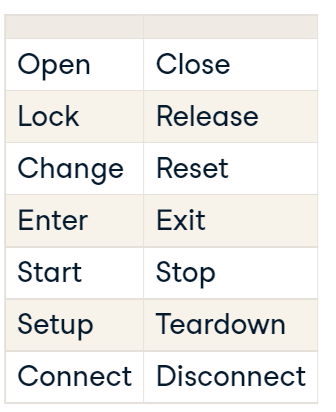

If you notice that your code is following any of these patterns, you might consider using a context manager.

#### Function as objects:

Decorators, a powerful way of modifying the behavior of functions.The main thing is that functions are just like any other object in Python. They are not fundamentally different from lists, dictionaries, DataFrames, strings, integers, floats, modules, or anything else in Python.

```python 
def x():
  pass
x = [1,2,3]
x = {'foo':41}
x = pandas.DataFrame()
x = 'This is sentence.'
x = 3
x = 71.2
import x
```
Functions are just another type of object, ywe can do anything to or with them that ywe would do with any other kind of object. 

We can take a function and assign it to a variable, like `x`. 

In [23]:
def my_function():
  print('Hello')
x = my_function
type(x)

function

Then, if we wanted to, you could call `x()` instead of `my_function()`. It doesn't have to be a function we defined, either. 

In [24]:
x()

Hello


If we felt so inclined, we could assign the `print()` function to PrintyMcPrintface, and use it as your `print()` function.

In [25]:
PrintMcPrintface = print
PrintMcPrintface('Python is awesome.')

Python is awesome.


We  can also add functions to a list or dictionary. Here, we've added the functions `my_function()`, `open()`, and `print()` to the list `list_of_functions`. 


In [26]:
list_of_functions = [my_function, open, print]

We can call an element of the list, and pass it arguments.


In [27]:
list_of_functions[2]('I am printing with an element of a list!')

I am printing with an element of a list!


Since the third element of the list is the print() function, it prints the string argument to the console. Below that, we've added the same three functions to a dictionary, under the keys `"func1"`, `"func2"`, and `"func3"`.

In [28]:
dict_of_functions = {
    'func1': my_function,
    'func2': open,
    'func3': print
}
dict_of_functions['func3']('I am printing with a value of a dict')

I am printing with a value of a dict


Since the `print()` function is stored under the key "func3", we can reference it and use it as if we were calling the func

#### Referencing a function:

When you assign a function to a variable, you do not include the parentheses after the function name. This is a subtle but very important distinction. When you type `my_function()` with the parentheses, you are calling that function. It evaluates to the value that the function returns. However, when you type `"my_function"` without the parentheses, you are referencing the function itself. It evaluates to a function object.

In [29]:
def my_function():
  return 23

x = my_function
my_function()

23

In [30]:
my_function

<function __main__.my_function>

Since a function is just an object like anything else in Python, you can pass one as an argument to another function. The `has_docstring()` function checks to see whether the function that is passed to it has a docstring or not. 

In [31]:
def has_docstring(func):
  """Check to see if the function 'func' has a docstring.

  Args:
    func(callable): A functiion

  Returns: 
    bool
  """
  return func.__doc__ is not None

We could define these two functions, `no()` and`yes()`, and pass them as arguments to the `has_docstring()` function. 

In [32]:
def no():
  return 12

def yes():
  """Return the value 12
  """
  return 12

Since the `no()` function doesn't have a docstring, the `has_docstring()` function returns False. Likewise, `has_docstring()` returns True for the `yes()` function.

In [33]:
has_docstring(no)

False

In [34]:
has_docstring(yes)

True

#### Defining a function inside another function:

Functions can also be defined inside other functions. These kinds of functions are called **nested functions**, although you may also hear them called **inner functions**, **helper functions**, or **child functions**.



In [35]:
def foo():
  x = [2,3,5]

  def bar(y):
    print(y)

  for value in x:
    bar(x)

A nested function can make your code easier to read. In this example, if `x` and `y` are within some bounds, `foo()` prints `x` times `y`. We can make that if statement easier to read by defining an `in_range()` function.


In [36]:
def foo(x,y):
  if x>4 and x<10 and y>4 and y<10:
    print(x*y)

In [37]:
def foo(x,y):
  def in_range(v):
    return v>4 and v<10
  
  if in_range(x) and in_range(y):
    print(x*y)

**Functions as return values**

There's also nothing stopping us from returning a function. For instance, the function `get_function()` creates a new function, `print_me()`, and then returns it. 

If we assign the result of calling `get_function()` to the variable "new_func", we are assigning the return value, "print_me()" to "new_func". We can then call `new_func()` as if it were the `print_me()` function.

In [38]:
def get_function():
  def print_me(s):
    print(s)
  return print_me

new_func = get_function() 
new_func('This is a google colab!')

This is a google colab!


The way that Python treats everything as an object and it gives you the ability to do a lot of really complex things.

**Returning functions for a math game**

You are building an educational math game where the player enters a math term, and your program returns a function that matches that term. For instance, if the user types "add", your program returns a function that adds two numbers. So far you've only implemented the "add" function. Now you want to include a "subtract" function.

In [39]:
def create_math_function(func_name):
  if func_name == 'add':
    def add (a, b):
      return a + b
    return add
  elif func_name == 'subtract':
    def subtract(a, b):
      return a - b
    return subtract
  else:
    print("I don't know that one")

add = create_math_function('add')
print('5 + 2 = {}'.format(add(5,2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5,2)))

5 + 2 = 7
5 - 2 = 3


#### Scope:

Before we can dig into decorators, we must understand how scope works in Python. Scope determines which variables can be accessed at different points in your code.

**Names:**

Names are very useful things, both in Python and in the real world. For instance, this is Tom and this is Janelle. 
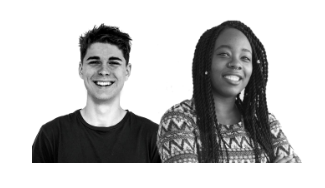


When we say "Tom", we know we are talking about the person on the left, and when we say "Janelle", we know we are talking about the person on the right. If Janelle says, "Tom didn't go to work yesterday," we can be fairly sure she is talking about the Tom standing next to her, and not some Tom in a different country. This is sort of how scope works in programming languages like Python.

Python has name too, variable names. 

In [40]:
x = 7
y = 100
print(x)

7


When we say `print(x)`. Here, Python knows we mean the `x` that we just defined. 

If we redefine x inside the function `foo()`. In `foo()`'s `print()` statement, do we mean the `x` that equals `42` or the `x` that equals `7`? Python applies the same logic we applied with Tom and Janelle and assumes we mean the `x` that was defined right there in the function. However, there is no `y`defined in the function `foo()`, so it looks outside the function for a definition when asked to print `y`. Note that setting `x` equal to `42` inside the function `foo()` doesn't change the value of `x` that we set earlier outside of the function.

In [41]:
def foo():
  x = 42
  print(x)
  print(y)

foo()

42
100


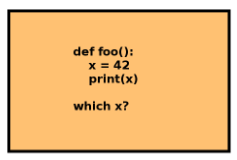

Python has to have strict rules about which variable you are referring to when using a particular variable name. So when we typed `print(x)` in the function `foo()`, the interpreter had to follow those rules to determine which `x` we meant.

First, the interpreter looks in the local scope. When you are inside a function, the local scope is made up of the arguments and any variables defined inside the function.

If the interpreter can't find the variable in the local scope, it expands its search to the global scope. These are the things defined outside the function.

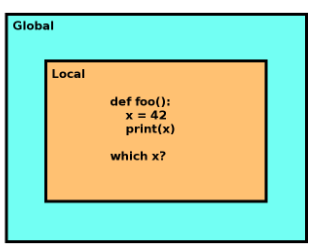

Finally, if it can't find the thing it is looking for in the global scope, the interpreter checks the builtin scope. These are things that are always available in Python. 

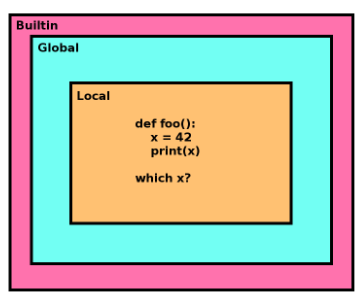

For instance, the `print()` function is in the builtin scope, which is why we are able to use it in our `foo()` function.

In the case of nested functions, where one function is defined inside another function, Python will check the scope of the parent function before checking the global scope. This is called the **nonlocal scope** to show that it is not the local scope of the child function and not the global scope.

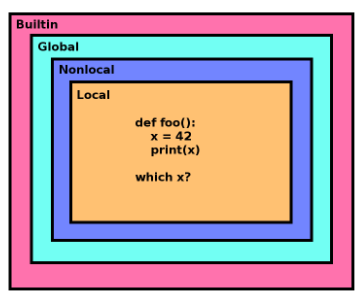

### The Global keyword:

Python only gives you read access to variables defined outside of your current scope. In `foo()` when we set `x`equal to `42`, Python assumed we wanted a new variable in the local scope, not the `x` in the global scope. 

In [42]:
x = 7 

def foo():
   x = 42
   print(x)

foo()

42


In [43]:
print(x)

7


If what we had really wanted was to change the value of `x` in the global scope, then we have to declare that we mean the global `x` by using the global keyword. 

In [44]:
x = 7

def foo():
  global x
  x = 42 
  print(x)
foo()

42


Notice that when we print `x `after calling `foo()` now, it prints `42` instead of `7` like it used to.

In [45]:
print(x)

42


However, you should try to avoid using global variables like this if possible, because it can make testing and debugging harder.

The nonlocal keyword:

If we ever want to modify a variable that is defined in the nonlocal scope, we have to use the `"nonlocal"` keyword. 

In [46]:
def foo():
  x = 10

  def bar():
    x = 200
    print(x)

  bar()
  print(x)

foo()

200
10


It works exactly the same as the `"global"` keyword, but it is used when you are inside a nested function, you want to update a variable that is defined inside your parent function.

In [47]:
def foo():
  x = 10

  def bar():
    nonlocal x
    x = 200
    print(x)

  bar()
  print(x)
  
foo ()

200
200


What four values does this script print?

In [48]:
x = 50 

def one():
  x = 10

def two():
  global x
  x = 30

def three():
  x = 100
  print(x)

for func in [one, two, three]:
  func()
  print(x)

50
30
100
30


* `one()` doesn't change the global `x`, so the first `print()` statement prints 50.

* `two()` does change the global `x` so the second `print()` statement prints 30.

* The `print()` statement inside the function `three()` is referencing the `x` value that is local to `three()`, so it prints 100.

* But `three()` does not change the global `x` value so the last `print()` statement prints 30 again.

**Modifying variables outside local scope**

Sometimes your functions will need to modify a variable that is outside of the local scope of that function. While it's generally not best practice to do so, it's still good to know how in case you need to do it. Update these functions so they can modify variables that would usually be outside of their scope.


In [49]:
call_count = 0

def my_function():
  global call_count
  call_count +=1

  print("You've called my_function() {} times!".format(call_count))

for i in range(20):
  my_function()

You've called my_function() 1 times!
You've called my_function() 2 times!
You've called my_function() 3 times!
You've called my_function() 4 times!
You've called my_function() 5 times!
You've called my_function() 6 times!
You've called my_function() 7 times!
You've called my_function() 8 times!
You've called my_function() 9 times!
You've called my_function() 10 times!
You've called my_function() 11 times!
You've called my_function() 12 times!
You've called my_function() 13 times!
You've called my_function() 14 times!
You've called my_function() 15 times!
You've called my_function() 16 times!
You've called my_function() 17 times!
You've called my_function() 18 times!
You've called my_function() 19 times!
You've called my_function() 20 times!


In [50]:
print(call_count)

20


#### Closures:
A closure in Python is a tuple of variables that are no longer in scope, but that a function needs in order to run. Let's explain this with an example. 

In [51]:
def foo():
  a = 3
  
  def bar():
    print(a)
  return bar

func = foo()
func()

3


The function `foo()` defines a nested function `bar()` that prints the value of "a". `foo()` returns this new function, so when we say `func = foo()` we are assigning the `bar()` function to the variable `func`.

If we call a `func()`, it prints the value of variable `a`, which is `5`.

But wait a minute, how does function `func()` know anything about variable `a`? `a` is defined in `foo()'s` scope, not `bar()'s`. You would think that `a` would not be observable outside of the scope of `foo()`. That's where closures come in. When `foo()` returned the new `bar()` function, Python helpfully attached any nonlocal variable that `bar()` was going to need to the function object. Those variables get stored in a tuple in the `__closure__` attribute of the function. The closure for `func` has one variable, and you can view the value of that variable by accessing the `cell_contents` of the item.

In [52]:
type(func.__closure__)

tuple

In [53]:
len(func.__closure__)

1

In [54]:
func.__closure__[0].cell_contents

3

**Closure and Deletion**

Let's examine this bit of code.  Here, x is defined in the global scope. `foo()` creates a function `bar()` that prints whatever argument was passed to `foo()`. When we call `foo()` and assign the result to `my_func`, we pass in `x`.

In [55]:
x = 25

def foo(value):
  def bar():
     print(value)
  return bar

my_func = foo(x)
my_func()

25


 So, as expected, calling `my_func()` prints the value of `x`. Now let's delete `x` and call `my_func()` again. What do you think will happen this time? 

In [56]:
del(x)
my_func()

25


If you guessed that we would still print `25`. That's because `foo()'s` value argument gets added to the closure attached to the new `my_func` function. So even though `x` doesn't exist anymore, the value persists in its closure.

In [57]:
len(my_func.__closure__)

1

In [58]:
my_func.__closure__[0].cell_contents

25

**Closures and overwiting:**

Notice that nothing changes if we overwrite `x` instead of deleting it.

In [59]:
x = 25 

def foo(value):
  def bar():
    print(value)
  return bar
x = foo(x)
x()

25


 Here we've passed `x` into `foo()` and then assigned the new function to the variable `x`. The old value of `x`is still `25` which is stored in the new function's closure, even though the new function is now stored in the `x` variable.

#### Nested Function:

A nested function is a function defined inside another function. We'll sometimes refer to the outer function as the parent and the nested function as the child.

In [60]:
# Outer function
def parent():
  # nested function
  def child():
    pass 
  return child

#### Nonlocal Variable:
A nonlocal variable is any variable that gets defined in the parent function's scope, and that gets used by the child function.

In [61]:
def parent(arg_1, arg_2):
  # From child()'s point of view, 
  # 'value' and 'my_dict' are nonlocal variables,
  # as are 'arg_1' and 'arg_2'.
  value = 22
  my_dict = {'chocolate': 'yummy'}

  def child():
    print( 2* value)
    print(my_dict['chocolate'])
    print(arg_1 + arg_2)

  return child

#### Closure:

A closure is Python's way of attaching nonlocal variables to a returned function so that the function can operate even when it is called outside of its parent's scope.

In [62]:
new_function = parent(2,4)
print([cell.cell_contents for cell in new_function.__closure__])

[2, 4, {'chocolate': 'yummy'}, 22]


**Task: Checking for closure**

You're teaching your niece how to program in Python, and she is working on returning nested functions. She thinks she has written the code correctly, but she is worried that the returned function won't have the necessary information when called. Show her that all of the nonlocal variables she needs are in the new function's closure.

In [63]:
def return_a_function(arg1,arg_2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg1 was {}'.format(arg_2))
  return new_func

my_func = return_a_function(2,17)

# Show that my_func()'s closure is not None
print(my_func.__closure__ is not None)

True


Show that there are two variables in the closure

In [64]:
print(len(my_func.__closure__) == 2)

True


Get the values of the variables in the closure.

In [65]:
closure_values = [my_func.__closure__[i].cell_contents for i in range(2)]
print(closure_values == [2,17])

True


She passed to `return_a_func()` are still accessible to the new function she returned, even after the program has left the scope of `return_a_func()`.

Values get added to a function's closure in the order they are defined in the enclosing function (in this case, arg1 and then arg2), but only if they are used in the nested function. That is, if `return_a_func()` took a third argument (e.g., arg3) that wasn't used by `new_func()`, then it would not be captured in `new_func()'s` closure.

**Closures keep your values safe**

You are still helping your niece understand closures. You have written the function `get_new_func()` that returns a nested function. The nested function `call_func()` calls whatever function was passed to `get_new_func()`. You've also written `my_special_function()` which simply prints a message that states that you are executing `my_special_function()`.

You want to show your niece that no matter what you do to `my_special_function()` after passing it to `get_new_func()`, the new function still mimics the behavior of the original `my_special_function()` because it is in the new function's closure.

In [66]:
def my_special_function():
  print('You are running my_special_function()')

def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Redefine my_special_function() to just print "hello"
def my_special_function():
  print("Hello")
new_func()

You are running my_special_function()


Show that even if you delete `my_special_function()`, you can still call `new_func()` without any problems.

In [67]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Delete my_special_function()
del my_special_function

new_func()

You are running my_special_function()


Show that you still get the original message even if you overwrite `my_special_function()` with the new function.

In [68]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

# Overwrite `my_special_function` with the new function
my_special_function = get_new_func(my_special_function)

my_special_function()

You are running my_special_function()


#### Decorators:

Let's say you have a function that takes some inputs and returns some outputs. A decorator is a wrapper that you can place around a function that changes that function's behavior.

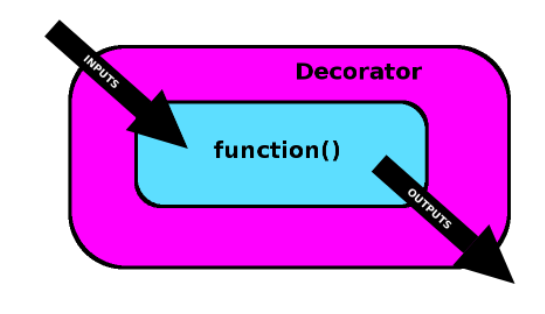

You can modify the inputs, modify the outputs, or even change the behavior of the function itself.

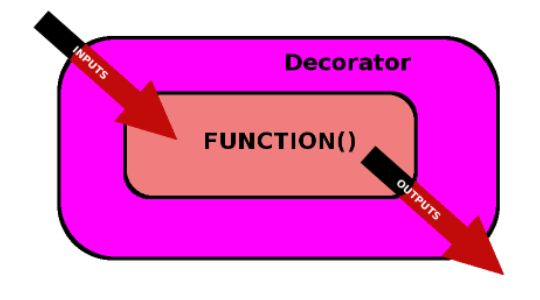

You may have seen decorators in Python before. When you use them, you type the `"@"` symbol followed by the decorator's name on the line directly above the function you are decorating. 

```python
@double_args
def multiply(a,b):
  return a*b

multiply(1,5)
```

Here, the `double_args` decorator modifies the behavior of the `multiply()` function. `double_args` is a decorator that multiplies every argument by two before passing them to the decorated function. So `1` times `5` becomes `2` times `10`, which equals `20`. That seems kind of magical that we can alter the behavior of functions, so let's peel back the layers and see how it works.

**The double_args decorator**

Let's continue to use the `multiply()` function as the function we are decorating. Decorators are just functions that take a function as an argument and return a modified version of that function.

To start off, let's not have `double_arg`s modify anything. It just takes a function and immediately returns it. 

In [69]:
def multiply(a, b):
  return a*b
def double_args(func):
  return func

new_multiply = double_args(multiply)
new_multiply(1,5)

5

In [70]:
multiply(1,5)

5

If we call this version of `double_args()` that does nothing and pass it the multiply function and then assign the result to the variable `new_multiply`, then we can call `new_multiply(1, 5)` and get the same value we would have gotten from `multiply(1, 5)`.

In order for your decorator to return a modified function, it is usually helpful for it to define a new function to return. We'll call that nested function `wrapper()`. All `wrapper()` does is take two arguments and passes them on to whatever function was passed to `double_args()` in the first place. If `double_args()` then returns the new `wrapper()` function, the return value acts exactly the same as whatever function was passed to `double_args()`, assuming that the function passed to `double_args()` also takes exactly two arguments. So, `double_args()` is still not doing anything to actually modify the function it is decorating. Once again, we'll pass` multiply()` to `double_args()` and assign the result to `new_multiply()`. If we then call `new_multiply()`, which is now equal to the `wrapper()` function, `wrapper()` calls `multiply()` because it is the function that was passed to `double_args()`.

In [71]:
def multiply(a,b):
  return a*b

def double_args(func):
  # Define a new function that we can modify
  def wrapper (a, b):
    # For now, just call the unmodified function
    return func(a, b)
  # Return the new function
  return wrapper

new_multiply = double_args(multiply)
new_multiply(1, 5)

5

 So `wrapper()` calls `multiply()` with the arguments `1` and `5`, which returns `5`.

Now let's actually modify the function our decorator is decorating. This time, `wrapper()` will still call whatever function is passed to `double_args()`, but it will double every argument when it calls the original function. See how it calls `func()` with `a` times `2` and `b` times `2`? As usual, we will call `double_args()` on the `multiply()` function and assign the result to `new_multiply()`. Now, what happens when we call `new_multiply()` with `1` and `5` as arguments?

In [72]:
def multiply(a, b):
  return a * b

def double_args(func):
  def wrapper(a, b):
    # Call the passed in function, but double each arguments
    return func(a*2, b*2)
  return wrapper

new_multiply = double_args(multiply)
new_multiply(1,5)

20

Well, `new_multiply()` is equal to `wrapper()`, which calls `multiply()` after doubling each argument. So `1` becomes `2` and `5` becomes `10`, giving us `2` times `10`, which equals `20`.

This time, instead of assigning the new function to `new_multiply`, we're going to overwrite the `multiply` variable. Now calling `multiply()` with arguments `1` and `5` gives us `20` instead of `5`. Remember that we can do this because Python stores the original multiply function in the new function's closure.

In [73]:
def multiply(a, b):
  return a * b

def double_args(func):
  def wrapper(a, b):
    # Call the passed in function, but double each arguments
    return func(a*2, b*2)
  return wrapper

multiply = double_args(multiply)
multiply(1,5)

20

In [74]:
multiply.__closure__[0].cell_contents

<function __main__.multiply>

**Decorator syntax**

When we first saw the `double_args()` decorator, We used `@double_args` on the line before the definition of `multiply()`. This is just a Python convenience for saying `multiply` equals the value returned by calling `double_args()` with `multiply` as the only argument. 

In [75]:
def double_args(func):
  def wrapper(a, b):
    return func(a * 2, b *2)
  return wrapper

  @double_args
  def multiply(a,b):
    return a * b

multiply(1,5)

20

**Defining a decorator**

Your buddy has been working on a decorator that prints a "before" message before the decorated function is called and prints an "after" message after the decorated function is called. They are having trouble remembering how wrapping the decorated function is supposed to work. Help them out.

In [76]:
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function  
  return wrapper

@print_before_and_after
def multiply(a,b,c):
  print(a*b*c)

multiply(2,4,7)

Before multiply
56
After multiply


#### Real World Example:

Some real-world decorators.

**Time a function**

The `timer()` decorator runs the decorated function and then prints how long it took for the function to run. I usually wind up adding some version of this to all of my projects because it is a pretty easy way to figure out where your computational bottlenecks are. All decorators have fairly similar-looking docstrings because they all take and return a single function. 

In [77]:
import time
def timer(func):
  """ A decorator that prints how long a function took to run.

  Args:
    func(callable): The function is decorated.

  Returns:
    callable: The decorated function
  """

For brevity, we will only include the description of the function in the docstrings of the examples.

Like most decorators, we'll start off by defining a `wrapper()` function. This is the function that the decorator will return. `wrapper()` takes any number of positional and keyword arguments so that it can be used to decorate any function. The first thing the new function will do is record the time that it was called with the `time()` function. Then `wrapper()` gets the result of calling the decorated function. We don't return that value yet though. After calling the decorated function, `wrapper()` checks the time again, and prints a message about how long it took to run the decorated function. Once we've done that, we need to return the value that the decorated function calculated.

In [78]:
import time
def timer(func):
  """ A decorator that prints how long a function took to run."""
  def wrapper(*args, **kwargs):
    # When wrapper() is called, get the current time.
    t_start = time.time()

    # Call the decorated function and store the result.
    result = func(*args, **kwargs)

    # Get the total time it took to run, and print it.
    t_total = time.time() - t_start
    print('{} took {}s'.format(func.__name__, t_total))
    return result
  return wrapper

**Using timer()**

So if we decorate this simple `sleep_n_seconds()` function, you can see that sleeping for `5` seconds takes about `5` seconds, and sleeping for `10` seconds takes about `10` seconds. This is a trivial use of the decorator to show it working, but it can be very useful for finding the slow parts of your code.

In [79]:
@timer
def sleep_n_seconds(n):
  time.sleep(n)
sleep_n_seconds(5)

sleep_n_seconds took 5.00345778465271s


In [80]:
sleep_n_seconds(10)

sleep_n_seconds took 10.00540566444397s


**Memoizing**

Memoizing is the process of storing the results of a function so that the next time the function is called with the same arguments; you can just look up the answer. We start by setting up a dictionary that will map arguments to results. Then, as usual, we create `wrapper()` to be the new decorated function that this decorator returns. When the new function gets called, we check to see whether we've ever seen these arguments before. If we haven't, we send them to the decorated function and store the result in the "cache" dictionary. Now we can look up the return value quickly in a dictionary of results. The next time we call this function with those same arguments, the return value will already be in the dictionary.

In [81]:
def memoize(func):
  """Store the results of the decorated function for fast lookup
  """
  # Store results in a dict that maps arguments to results.
  cache = {}
  # Define the wrapper function to return.
  def wrapper(*args, **kwargs):
    # If these arguments haven't been seen before, 
    if (args, kwargs) not in cache:
      # Call func() and store the result
      cache[(args, kwargs)] = func(*args, **kwargs)
    return cache[(args, kwargs)]
  return wrapper



Here we are memoizing `slow_function()`. `slow_function()` simply returns the sum of its arguments. In order to simulate a slow function, we have it sleep for 5 seconds before returning. If we call `slow_function()` with the arguments `3` and `4`, it will sleep for `5` seconds and then return `7`. 

```python
@memoize
def slow_function(a, b):
  print('Sleeping')
  time.sleep(5)
  return a + b

slow_function(3,4)

```

But if we call `slow_function()` with the arguments `3` and `4` again, it will immediately return `7`. Because we've stored the answer in the cache, the decorated function doesn't even have to call the original `slow_function()` function.

**When to use decorators**

You should consider using a decorator when you want to add some common bit of code to multiple functions.
We could have added timing code in the body of all three of these functions, but that would violate the principle of Don't Repeat Yourself. Adding a decorator is a better choice.

```python 

@timer
def foo():
  # do some computaion

@timer
def bar():
  # do some computation

@timer
def baz():
  # do someting else.
```

**Task: Print the return type**

You are debugging a package that you've been working on with your friends. Something weird is happening with the data being returned from one of your functions, but you're not even sure which function is causing the trouble. You know that sometimes bugs can sneak into your code when you are expecting a function to return one thing, and it returns something different. For instance, if you expect a function to return a numpy array, but it returns a list, you can get unexpected behavior. To ensure this is not what is causing the trouble, you decide to write a decorator, `print_return_type()`, that will print out the type of the variable that gets returned from every call of any function it is decorating.

In [82]:
def print_return_type(func):
  # Define a wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorate
    result = func(*args,**kwargs)
    print('{}() returned type {}'.format(func.__name__, type(result)))
    return result
  # Return the decorated function
  return wrapper

@print_return_type
def foo(value):
  return value
print(foo(42))
print(foo([1,2,3]))
print(foo({'a':42}))

foo() returned type <class 'int'>
42
foo() returned type <class 'list'>
[1, 2, 3]
foo() returned type <class 'dict'>
{'a': 42}


**Counter**

You're working on a new web app, and you are curious about how many times each of the functions in it gets called. So you decide to write a decorator that adds a counter to each function that you decorate. You could use this information in the future to determine whether there are sections of code that you could remove because they are no longer being used by the app.

In [83]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return counter(wrapper.count)
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter
@counter
def foo():
  print('calling foo()')

foo()
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

foo() was called 3 times.


#### Decorators and metadata:

One of the problems with decorators is that they obscure the decorated function's metadata.

**Function with a docstring**

Here we have a nice function, `sleep_n_seconds()`, with a docstring that explains exactly what it does. If we look at the docstring attribute, we can see the text of the docstring.

In [84]:
def sleep_n_seconds(n=10):
  """Pause processing for n seconds.

  Args:
    n (int): The number of seconds to pause for.
  """
  time.sleep(n)

print(sleep_n_seconds.__doc__)

Pause processing for n seconds.

  Args:
    n (int): The number of seconds to pause for.
  


**Other metadata**

We can also access other metadata for the function, like its name and default arguments.

In [85]:
print(sleep_n_seconds.__name__)

sleep_n_seconds


In [86]:
print(sleep_n_seconds.__defaults__)

(10,)


But watch what happens when we decorate `sleep_n_seconds()` with the `timer()` decorator as we've done here. When we try to print the docstring, we get nothing back. 

In [87]:
@timer
def sleep_n_seconds(n=10):
  """Pause processing for n seconds.

  Args:
    n (int): The number of seconds to pause for.
  """
  time.sleep(n)

print(sleep_n_seconds.__doc__)

None


Even stranger, when we try to look up the function's name, Python tells us that `sleep_n_seconds()`'s name is `wrapper`.

In [88]:
print(sleep_n_seconds.__name__)

wrapper


**The timer decorator**

To understand why we have to examine the `timer()` decorator. Remember that when we write decorators, we almost always define a nested function to return. Because the decorator overwrites the `sleep_n_seconds()` function, when you ask for `sleep_n_seconds()'s` docstring or name, you are actually referencing the nested function that was returned by the decorator. In this case, the nested function was called `wrapper()` and it didn't have a docstring.

In [89]:
def timer(func):
  """ A decorator that prints how hong a function took to run."""
  def wrapper(*args, **kwargs):
    t_start = time.time()

    result = func(*args, **kwargs)

    t_total = time.time() - t_start
    print('{} took {}s'.format(func.__name__, t_total))

    return result
  return wrapper

**functools.wraps()**

Fortunately, Python provides us with an easy way to fix this. The `wraps()` function from the `functools` module is a decorator that you use when defining a decorator. If you use it to decorate the wrapper function that your decorator returns, it will modify `wrapper()'s` metadata to look like the function you are decorating. 

In [90]:
from functools import wraps

def timer(func):
  """A decorator that prints how long a function took to run."""

  @wraps(func)

  def wrapper(*args, **kwargs):
    t_start = time.time()

    result = func(*args, **kwargs)

    t_total = time.time() - t_start

    print('{} took {}s'.format(func.__name__, t_total))

    return result
  return wrapper

Notice that the `wraps()` decorator takes the function you are decorating as an argument.  If we use this updated version of the `timer()` decorator to decorate `sleep_n_seconds()` and then try to print `sleep_n_seconds()'s` docstring, we get the result we expect.

In [91]:
@timer 

def sleep_n_seconds(n=10):
  """Pause processing for n seconds.

  Args:
    n (int): The number of seconds to pause for.
  """
  time.sleep(n)
print(sleep_n_seconds.__doc__)

Pause processing for n seconds.

  Args:
    n (int): The number of seconds to pause for.
  


Likewise, printing the name or any other metadata now gives you the metadata from the function being decorated rather than the metadata of the `wrapper()` function.

In [92]:
print(sleep_n_seconds.__name__)

sleep_n_seconds


In [93]:
print(sleep_n_seconds.__defaults__)

None


Using `wraps()`, when creating your decorator also gives you easy access to the original undecorated function via the `__wrapped__` attribute. Of course, you always had access to this function via the closure, but this is an easy way to get to it if you need it.

In [94]:
sleep_n_seconds.__wrapped__

<function __main__.sleep_n_seconds>

**Preserving docstrings when decorating functions**

Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.

In [95]:
def add_hello(func):
  def wrapper(*args, **kwargs):
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a,b):
  """Add two numbers and prints the sum"""

  print(a+b)

print_sum(2,3)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
5
None


To show your friend that they are printing the `wrapper()` function's docstring, not the `print_sum()` docstring, add the following docstring to `wrapper()`:
```python 
"""Print 'hello' and then call the decorated function.""" 
```

In [96]:
def add_hello(func):
  # Add a docstring to wrapper
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Print 'hello' and then call the decorated function.


Import a function that will allow you to add the metadata from `print_sum()` to the decorated version of `print_sum()`.

In [97]:
# Import the function to fix this problem
from functools import wraps 

def add_hello(func):
  def wrapper(*args, **kwargs):
    """ Print 'hello' and then call the decorated function."""
    print('hello')
    return func(*args, **kwargs)
  return wrapper

@add_hello
def print_sum(a,b):
  """ Add two numbers and prints the sum"""
  print(a+b)

print_sum(2,3)
print_sum_docstrings = print_sum.__doc__
print(print_sum_docstrings)

hello
5
 Print 'hello' and then call the decorated function.


Finally, decorate `wrapper()` so that the metadata from `func()` is preserved in the new decorated function.

In [98]:
from functools import wraps 

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """ Print 'hello' and then call the decorated function."""
    print('hello')
    return func(*args, **kwargs)
  return wrapper

@add_hello
def print_sum(a,b):
  """ Add two numbers and prints the sum"""
  print(a+b)

print_sum(2,3)
print_sum_docstrings = print_sum.__doc__
print(print_sum_docstrings)

hello
5
 Add two numbers and prints the sum


**Measuring decorator overhead**

Your boss wrote a decorator called `check_everything()` that they think is amazing, and they are insisting you use it on your function. However, you've noticed that when you use it to decorate your functions, it makes them run much slower. You need to convince your boss that the decorator is adding too much processing time to your function. To do this, you are going to measure how long the decorated function takes to run and compare it to how long the undecorated function would have taken to run. This is the decorator in question:
``` python
def check_everything(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    check_inputs(*args, **kwargs)
    result = func(*args, **kwargs)
    check_outputs(result)
    return result
  return wrapper
```

Call the original function instead of the decorated version by using an attribute of the function that the `wraps()` statement in your boss's decorator added to the decorated function.

```python
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__ (list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

```

#### Decorators that take arguments:
Sometimes it would be nice to add arguments to our decorators. To do that, we need another level of function nesting. Let's consider this silly `run_three_times()` decorator. If you use it to decorate a function, it will run that function three times. If we use it to decorate the `print_sum()` function and then run `print_sum(3,5)`, it will print `8` three times.

In [99]:
def run_three_times(func):
  def wrapper(*args, **kwargs):
    for i in range(3):
      func(*args, **kwargs)
  return wrapper

@run_three_times
def print_sum(a,b):
  print(a+b)

print_sum(3,5)

8
8
8


**run_n_times()**

Let's think about what we would need to change if we wanted to write a `run_n_times()` decorator. We want to pass `n` as an argument, instead of hard-coding it in the decorator. If we had some way to pass `n` into the decorator, we could decorate `print_sum()` so that it gets run three times and decorate `print_hello()` to run five times. But a decorator is only supposed to take one argument - the function it is decorating. Also, when you use decorator syntax, you're not supposed to use the parentheses. So what gives?

```python 
  def run_n_times(func):
    def wrapper(*args, **kwargs):
      # How to we pass 'n' into this function?
      for i in range(???):
        func(*args, **kwargs)
    return wrapper

  @run_n_times(3)
  def print_sum(a, b):
    print( a + b)

  @run_n_times(5)
  def print_hello():
    print('Hello!')
```

**A decorator factory**

To make `run_n_times()` work, we have to turn it into a function that returns a decorator, rather than a function that is a decorator. So let's start by redefining `run_n_times()` so that it takes `n` as an argument, instead of func. Then, inside of `run_n_times()`, we'll define a new decorator function. This function takes `func` as an argument because it is the function that will be acting as our decorator. We start our new decorator with a nested `wrapper()` function, as usual. Now, since we are still inside the `run_n_times()` function, we have access to the `n` parameter that was passed to `run_n_times()`. We can use that to control how many times we repeat the loop that calls our decorated function. As usual for any decorator, we return the new `wrapper()` function. And, if `run_n_times()` returns the `decorator()` function we just defined, then we can use that return value as a decorator. 


Notice how when we decorate `print_sum()` with `run_n_times()`, we use parentheses after `@run_n_times`. This indicates that we are actually calling `run_n_times()` and decorating `print_sum()` with the result of that function call. Since the return value from `run_n_times()` is a decorator function, we can use it to decorate `print_sum()`.

In [100]:
def run_n_times(n):
  """Define and return a decorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
    return wrapper
  return decorator

@run_n_times(3)
def print_sum(a, b):
  print(a + b)
print_sum(2,3)

5
5
5


This is a little bit confusing, so let me show you how this works without using decorator syntax. Like before, we have a function, `run_n_times()` that returns a decorator function when you call it. If we call `run_n_times()` with the argument `3`, it will return a decorator. 

In fact, it returns the decorator that we defined at the beginning of this lesson, `run_three_times()`. We could decorate `print_sum()` with this new decorator using decorator syntax. Python makes it convenient to do both of those in a single step though. When we use decorator syntax, the thing that comes after the `@` symbol must be a reference to a decorator function. We can use the name of a specific decorator, or we can call a function that returns a decorator.

```python 
  def run_n_times(n):
  """Define and return a docorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
      return wrapper
  return decorator

run_three_times = run_n_times(3)
@run_three_times
def print_sum(a, b):
  print(a + b)

@run_n_times(3)
def print_sum(a, b):
  print(a + b)

```

**Using run_n_times()**

To prove to you that it works the way we expect here is `print_sum()`decorated with `run_n_times(3)`. When we call `print_sum()` with the arguments `3` and `5`, it prints `8` three times. 

In [101]:
@run_n_times(3)
def print_sum(a, b):
  print(a+b)
print_sum(3,5)

8
8
8


In [102]:
@run_n_times(5)
def print_hello():
  print('Hello')
print_hello()

Hello
Hello
Hello
Hello
Hello


**HTML Generator**

You are writing a script that generates HTML for a webpage on the fly. So far, you have written two decorators that will add bold or italics tags to any function that returns a string. You notice, however, that these two decorators look very similar. Instead of writing a bunch of other similar looking decorators, you want to create one decorator, `html()`, that can take any pair of opening and closing tags.

```python
def bold(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<b>{}</b>'.format(msg)
  return wrapper

def italics(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<i>{}</i>'.format(msg)
  return wrapper
```



Return the decorator and the decorated function from the correct places in the new `html()` decorator.

In [103]:
from functools import wraps 

def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

Use the `html()` decorator to wrap the return value of `hello()` in the strings `<b>` and `</b>` (the HTML tags that mean "bold").

In [104]:
# Make hello() return bolded text
@html('<b>', '</b>')
def hello(name):
  return 'Hello{}!'.format(name)
print(hello('Alice'))

<b>HelloAlice!</b>


Use `html()` to wrap the return value of `goodbye()` in the strings `<i> `and `</i>` (the HTML tags that mean "italics").

In [105]:
@html('<i>', '</i>')
def goodbye(name):
  return 'Goodbye{}'.format(name)

print(goodbye('Alice'))

<i>GoodbyeAlice</i>


Use `html()` to wrap `hello_goodbye()` in a DIV, which is done by adding the strings `<div>` and `</div>` tags around a string.

In [106]:
@html('<div>', '</div>')
def hello_goodbye(name):
  return 'n{}\n{}\n'.format(hello(name), goodbye(name))

print(hello_goodbye('Alice'))

<div>n<b>HelloAlice!</b>
<i>GoodbyeAlice</i>
</div>


#### Real world example:

An example of a real-world decorator that takes an argument to give you a better sense of how they work.

**Timeout**

For our first example, let's imagine that we have some functions that occasionally either run for longer than we want them to or just hang and never return.

In [107]:
def function1():
  # This function sometimes
  # runs for looooong time
  ...

def function2():
  # This function sometimes 
  # hangs and doesn't return 
  ...

It would be nice if we could add some kind of `timeout()` decorator to those functions that will raise an error if the function runs for longer than expected. 

```python
@timeout
def function1():
  # This function sometimes
  # runs for looooong time
  ...
@timeout
def function2():
  # This function sometimes 
  # hangs and doesn't return 
  ...
```

To create the `timeout()` decorator, we are going to use some functions from Python's signal module. These functions have nothing to do with decorators, but understanding them will help you understand the `timeout()` decorator. The `raise_timeout()` function simply raises a TimeoutError when it is called. The `signal()` function tells Python, "When you see the signal whose number is `signalnum`, call the handler function." In this case, we tell Python to call `raise_timeout()` whenever it sees the alarm signal. The `alarm()` function lets us set an alarm for some number of seconds in the future. Passing 0 to the `alarm()` function cancels the alarm.

In [108]:
import signal

def raise_timeout(*args, **kwargs):
  raise TimeoutError()

# When an 'alarm' signal goes off, the raise_timeout()
signal.signal(signalnum = signal.SIGALRM, handler = raise_timeout)

# Set off an alarm in 5 sec
signal.alarm(5)

# Cancel the alarm
signal.alarm(0)

5

**Timeout in 5 seconds**

We'll start by creating a decorator that times out in exactly 5 seconds, and then build from there to create a decorator that takes the timeout length as an argument. Our `timeout_in_5s()` decorator starts off by defining a `wrapper()` function to return as the new decorated function. Returning this function is what makes `timeout_in_5s()` a decorator. First `wrapper()` sets an alarm for `5` seconds in the future. Then it calls the function being decorated. It wraps that call in a try block so that in a finally block we can cancel the alarm. This ensures that the alarm either rings or gets canceled. Remember, when the alarm rings, Python calls the `raise_timeout()` function. Let's use `timeout_in_5s()` to decorate a function that will definitely timeout. `foo()` sleeps for `10` seconds and then prints`"foo!"`. If we call `foo()`, the `5-second` alarm will ring before it finishes sleeping, and Python will raise a `TimeoutErrror`.

```python 
def timeout_in_5s(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    # Set an alarm for 5 seconds
    signal.alarm(5)
    try:
      # Call the decorated function 
      return func(*args, **kwargs)
    finally:
      # Cancel alarm
      signal.alarm(0)
  return wrapper

@timeout_in_5s
def foo():
  time.sleep(10)
  print('foo!')

foo()
```

**Timeout in n seconds**

Now let's create a more useful version of the `timeout()` decorator. This decorator takes an argument. To decorate `foo()` we'll set the timeout to `5` seconds like we did previously. But when decorating `bar()`, we can set the timeout to `20` seconds. This allows us to set a timeout that is appropriate for each function. `timeout()` is a function that returns a decorator. I like to think of it as a decorator factory. When you call `timeout()`, it cranks out a brand new decorator that times out in `5` seconds, or `20` seconds, or whatever value we pass as `n_seconds`. The first thing we need to do is define this new decorator that it will return. That decorator begins, like all of our decorators, by defining a `wrapper()` function to return. Now because `n_seconds` is available to the `wrapper()` function we can set an alarm for n_seconds in the future. The rest of the `wrapper()` function looks exactly like the `wrapper()` function from the `timeout_in_5s()` function.  

In [118]:
def timeout(n_seconds):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
    # Set an alarm for n seconds 
      signal.alarm(n_seconds)
      try:
        # Call the decorated function
        return func(*args, **kwargs)
      finally:
        # Cancel alarm
        signal.alarm(0)
    return wrapper 
  return decorator

In [120]:
@timeout(5)
def foo():
  time.sleep(10)
  print('foo!')
foo()

TimeoutError: ignored

Notice that `wrapper()` returns the result of calling `func()`, `decorator()` returns wrapper, and `timeout()` returns decorator. So when we call `foo()`, which has a `5-second` timeout, it will timeout like before.

In [121]:
@timeout(20)
def bar():
  time.sleep(10)
  print('bar!')


bar()

bar!


But `bar()`, which has a `20-second` timeout, prints its message in `10` seconds, so the alarm gets canceled.

**Tag your functions**

Tagging something means that you have given that thing one or more strings that act as labels. For instance, we often tag emails or photos so that we can search for them later. You've decided to write a decorator that will let you tag your functions with an arbitrary list of tags. You could use these tags for many things:

* Adding information about who has worked on the function, so a user can look up who to ask if they run into trouble using it.
* Labeling functions as `"experimental"` so that users know that the inputs and outputs might change in the future.
* Marking any functions that you plan to remove in a future version of the code.
* Etc.

In [122]:
def tag(*tags):
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function bedin gecorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

('test', 'this is a tag')


**Check the return type**
Python's flexibility around data types is usually cited as one of the benefits of the language. It can sometimes cause problems though if incorrect data types go unnoticed. You've decided that in order to ensure your code is doing exactly what you want it to do, you will explicitly check the return types in all of your functions and make sure they're returning what you expect. To do that, you are going to create a decorator that checks if the return type of the decorated function is correct.

**Note:** `assert` is a keyword that you can use to test whether something is true. If you type `assert condition` and condition is `True`, this function doesn't do anything. If condition is `False`, this function raises an error. The type of error that it raises is called an `AssertionError`.

In [124]:
def return_dict(func):
  def wrapper(*args, **kwargs):
    result = func(*args, **kwargs)
    assert type(result) == dict
    return result 
  return wrapper

@return_dict
def foo(value):
  return value
try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!
